In [40]:
import numpy as np
import tensorflow as tf 
from tensorflow import keras
import sys, cv2, glob
import matplotlib.pyplot as plt
from IPython.display import Image
import sklearn

In [2]:
vgg16_pretrained = keras.applications.vgg16.VGG16(weights = 'imagenet', include_top = True, input_shape = (224,224,3))

print(vgg16_pretrained.summary())


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [3]:
keras.utils.plot_model(vgg16_pretrained)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


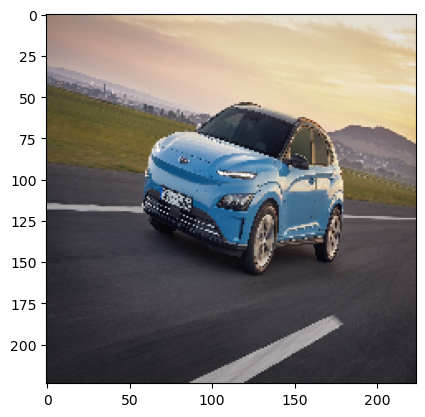

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


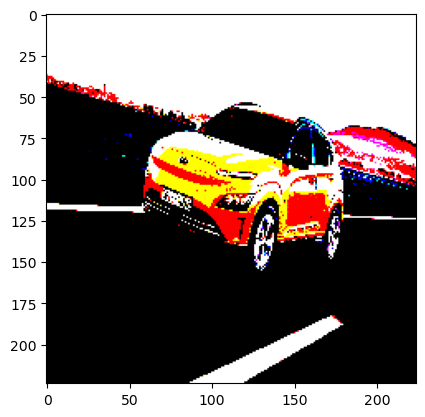

In [4]:
car_img = 'fig/car1.jpg'
plane_img = 'fig/airplane_1.jpg'
dog_img = 'fig/beagle.jpg'

img = keras.preprocessing.image.load_img(car_img, target_size=(224,224))
x = keras.preprocessing.image.img_to_array(img) # numpy로 바꿔줌
x = np.expand_dims(x,axis=0)
x = keras.applications.vgg16.preprocess_input(x)  # (x-128)/255 를 해주는 함수

plt.imshow(img)
plt.show()

plt.imshow(x[0])
plt.show()


In [5]:

output=vgg16_pretrained.predict(x)

class_name = keras.applications.vgg16.decode_predictions(output,top = 3)  # np.argmax(output[0].flatten()) 중에 top 3개 표시

print(class_name)

1/1 [==============================] - 1s 559ms/step
[[('n04285008', 'sports_car', 0.48656526), ('n04037443', 'racer', 0.42286223), ('n02974003', 'car_wheel', 0.042402178)]]


In [6]:

name = class_name[0][0][1]
prob = class_name[0][0][2]

print(name, prob)


sports_car 0.48656526


In [9]:
img_opencv = cv2.imread(car_img, cv2.IMREAD_REDUCED_COLOR_2)

text = f'{name}, {prob * 100 :.2f}%'
cv2.putText(img_opencv, text, (10,30), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0,0,255), 1, cv2.LINE_AA)

cv2.imshow('image', img_opencv)

cv2.waitKey()
cv2.destroyAllWindows()


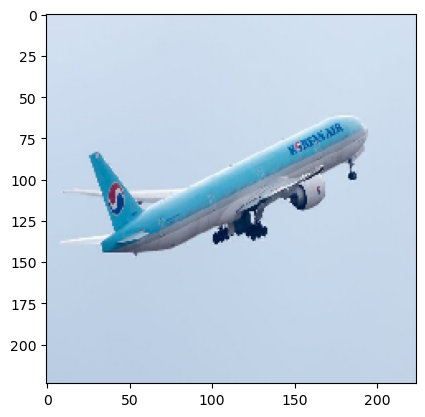

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


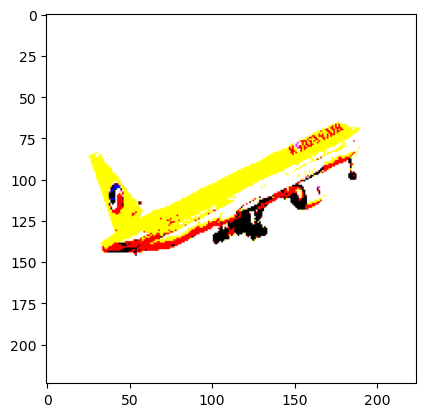

1/1 [==============================] - 0s 426ms/step


In [11]:
img = keras.preprocessing.image.load_img(plane_img, target_size=(224,224))
x = keras.preprocessing.image.img_to_array(img) # numpy로 바꿔줌
x = np.expand_dims(x,axis=0)
x = keras.applications.vgg16.preprocess_input(x)  # (x-128)/255 를 해주는 함수

plt.imshow(img)
plt.show()

plt.imshow(x[0])
plt.show()

output=vgg16_pretrained.predict(x)
class_name = keras.applications.vgg16.decode_predictions(output,top = 3)  # np.argmax(output[0].flatten()) 중에 top 3개 표시
# print(class_name)

name = class_name[0][0][1]
prob = class_name[0][0][2]
# print(name, prob)


img_opencv = cv2.imread(plane_img, cv2.IMREAD_REDUCED_COLOR_2)

text = f'{name}, {prob * 100 :.2f}%'
cv2.putText(img_opencv, text, (10,30), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0,0,255), 1, cv2.LINE_AA)

cv2.imshow('image', img_opencv)

cv2.waitKey()
cv2.destroyAllWindows()


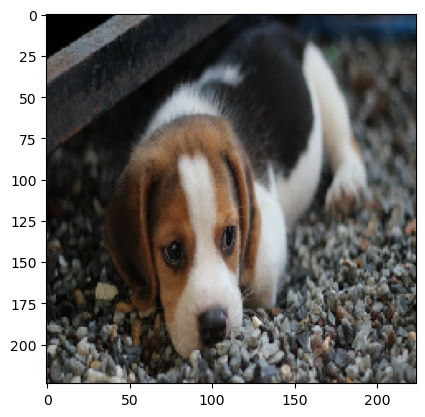

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


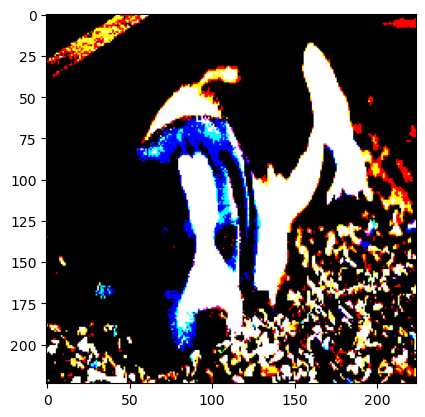

1/1 [==============================] - 0s 421ms/step


In [14]:
img = keras.preprocessing.image.load_img(dog_img, target_size=(224,224))
x = keras.preprocessing.image.img_to_array(img) # numpy로 바꿔줌
x = np.expand_dims(x,axis=0)
x = keras.applications.vgg16.preprocess_input(x)  # (x-128)/255 를 해주는 함수

plt.imshow(img)
plt.show()

plt.imshow(x[0])
plt.show()

output=vgg16_pretrained.predict(x)
class_name = keras.applications.vgg16.decode_predictions(output,top = 3)  # np.argmax(output[0].flatten()) 중에 top 3개 표시
# print(class_name)

name = class_name[0][0][1]
prob = class_name[0][0][2]
# print(name, prob)


img_opencv = cv2.imread(dog_img)

text = f'{name}, {prob * 100 :.2f}%'
cv2.putText(img_opencv, text, (10,30), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0,0,255), 1, cv2.LINE_AA)

cv2.imshow('image', img_opencv)

cv2.waitKey()
cv2.destroyAllWindows()


In [ ]:
vgg16_pretrained = keras.applications.vgg16.VGG16(weights = 'imagenet', include_top = True, input_shape = (224,224,3))

In [33]:
import glob
img_paths = glob.glob('./fig/my_images/*.*')

# display(img_paths)

cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.setWindowProperty('image',cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)

if img_paths is None:
    print('image not found')

idx = 0
while True:
    img = keras.preprocessing.image.load_img(img_paths[idx], target_size=(224,224))

    if img is None:
        print('image not found')
        break
    
    x = keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x,axis=0)
    x = keras.applications.vgg16.preprocess_input(x)
    
    output=vgg16_pretrained.predict(x)
    class_name = keras.applications.vgg16.decode_predictions(output,top = 3)  # np.argmax(output[0].flatten()) 중에 top 3개 표시
    
    name = class_name[0][0][1]
    prob = class_name[0][0][2]
    
    img_opencv = cv2.imread(img_paths[idx])

    text = f'{name}, {prob * 100 :.2f}%'
    cv2.putText(img_opencv, text, (10,30), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0,0,255), 1, cv2.LINE_AA)

    cv2.imshow('image', img_opencv)
    
    
    if  cv2.waitKey(3000) == 27:
        break
    idx += 1

    if idx >= (len(img_paths)):
        idx = 0

cv2.destroyAllWindows()

1/1 [==============================] - 0s 346ms/step


In [ ]:
vgg16_pretrained = keras.applications.vgg16.VGG16(weights = 'imagenet', include_top = True, input_shape = (224,224,3))

In [35]:
inputs = keras.Input(shape = (150,150,3))
conv1 = keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu')(inputs)
conv2 = keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu')(conv1)
max_pool = keras.layers.MaxPool2D(pool_size = 2)(conv2)
flatten = keras.layers.Flatten()(max_pool)
dense1 = keras.layers.Dense(120, activation = 'relu')(flatten)
drop_out = keras.layers.Dropout(0.3)(dense1)
dense2 = keras.layers.Dense(32, activation = 'relu')(drop_out)
outputs = keras.layers.Dense(1, activation = 'sigmoid')(dense2)

alz_model = keras.Model(inputs = inputs, outputs = outputs)
alz_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 conv2d_3 (Conv2D)           (None, 146, 146, 32)      18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 170528)            0         
                                                                 
 dense (Dense)               (None, 120)               20463480  
                                                             

In [39]:

ad_img_path = glob.glob('fig/train/ad/*.*') + glob.glob('fig/test/ad/*.*')
nor_img_path = glob.glob('fig/train/normal/*.*') + glob.glob('fig/test/normal/*.*')
img_paths = ad_img_path + nor_img_path

target = np.array([1]*len(ad_img_path) + [0]*len(nor_img_path))
print(len(target))

imgs = np.zeros((0,150,150,3), np.float32)

for img_path in img_paths:
    img = cv2.imread(img_path)
    img = (img.astype(np.float32))/255.
    img = np.expand_dims(img, axis=0)
    imgs = np.append(imgs, img, axis=0)

print(imgs.shape)


280
(280, 150, 150, 3)


In [68]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(imgs, target, test_size= 0.2,shuffle=True)

print(x_train.shape,'\n',y_train.shape)

(224, 150, 150, 3) 
 (224,)


In [46]:

alz_model.compile(loss='binary_crossentropy', optimizer='adam',metrics='acc')

checkpoint = keras.callbacks.ModelCheckpoint(filepath= 'fig/alz_model.h5', save_best_only=True)
earlystop = keras.callbacks.EarlyStopping(patience=5)


In [51]:
history = alz_model.fit(x_train, y_train, epochs=200, batch_size=20, validation_data= (x_test, y_test), callbacks=[checkpoint, earlystop])

Epoch 1/200
12/12 [==============================] - 13s 1s/step - loss: 7.6071e-04 - acc: 1.0000 - val_loss: 0.2098 - val_acc: 0.9286
Epoch 2/200
12/12 [==============================] - 11s 933ms/step - loss: 7.2465e-04 - acc: 1.0000 - val_loss: 0.2881 - val_acc: 0.9286
Epoch 3/200
12/12 [==============================] - 12s 991ms/step - loss: 4.7999e-04 - acc: 1.0000 - val_loss: 0.1880 - val_acc: 0.9286
Epoch 4/200
12/12 [==============================] - 13s 1s/step - loss: 1.7720e-04 - acc: 1.0000 - val_loss: 0.1208 - val_acc: 0.9464
Epoch 5/200


KeyboardInterrupt: 

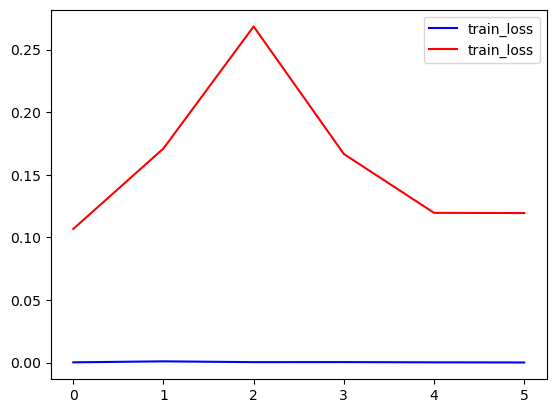

In [50]:
plt.plot(history.history['loss'], color = 'b', label = 'train_loss')
plt.plot(history.history['val_loss'], color = 'r', label = 'train_loss')

plt.legend()

plt.show()

In [57]:

# alz_model.evaluate(x_test,y_test)
X_test = np.expand_dims(x_test[0], axis=0)
alz_model.predict(X_test)

1/1 [==============================] - 0s 44ms/step


array([[0.9999999]], dtype=float32)

In [61]:
transfer_vgg16 = keras.applications.vgg16.VGG16(weights= 'imagenet',include_top=False, input_shape=(150,150,3))
transfer_vgg16.trainable = False

transfer_vgg16.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [62]:
Sequential = keras.Sequential()
Sequential.add(transfer_vgg16)
Sequential.add(keras.layers.Flatten())
Sequential.add(keras.layers.Dense(64, activation = 'relu'))
Sequential.add(keras.layers.Dropout(0.3))
Sequential.add(keras.layers.Dense(1,activation = 'sigmoid'))

Sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_3 (Dense)             (None, 64)                524352    
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 15,239,105
Trainable params: 524,417
Non-trainable params: 14,714,688
_________________________________________________________________


In [69]:
Sequential.compile(loss='binary_crossentropy', optimizer='adam', metrics='acc')

history = Sequential.fit(x_train, y_train, epochs=200, batch_size=20, validation_data= (x_test, y_test), callbacks=[checkpoint, earlystop])

Epoch 1/200
12/12 [==============================] - 34s 3s/step - loss: 0.4177 - acc: 0.8170 - val_loss: 0.3581 - val_acc: 0.8571
Epoch 2/200
12/12 [==============================] - 31s 3s/step - loss: 0.3634 - acc: 0.8080 - val_loss: 0.2776 - val_acc: 0.8750
Epoch 3/200
12/12 [==============================] - 30s 3s/step - loss: 0.2851 - acc: 0.8973 - val_loss: 0.1776 - val_acc: 0.9464
Epoch 4/200
12/12 [==============================] - 30s 3s/step - loss: 0.2384 - acc: 0.9241 - val_loss: 0.1793 - val_acc: 0.9643
Epoch 5/200
12/12 [==============================] - 29s 2s/step - loss: 0.1969 - acc: 0.9598 - val_loss: 0.1191 - val_acc: 1.0000
Epoch 6/200
12/12 [==============================] - 29s 2s/step - loss: 0.1886 - acc: 0.9330 - val_loss: 0.1292 - val_acc: 0.9821
Epoch 7/200
12/12 [==============================] - 29s 2s/step - loss: 0.1351 - acc: 0.9598 - val_loss: 0.0956 - val_acc: 0.9821
Epoch 8/200
12/12 [==============================] - 30s 3s/step - loss: 0.1624 - a

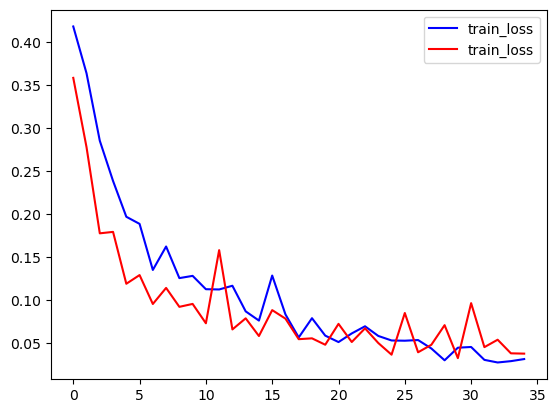

In [70]:
plt.plot(history.history['loss'], color = 'b', label = 'train_loss')
plt.plot(history.history['val_loss'], color = 'r', label = 'train_loss')

plt.legend()

plt.show()